In [18]:
import pandas as pd 
# pd.set_option("display.max_rows", 100)
import os 
import pathlib
import re 
import dateparser
from sudulunu.helpers import pp, make_num, dumper, rc

import sys

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ## This is grabbing the data out of the excel sheets
# pathos = 'input/data_sources'
# iterrer = pathlib.Path(pathos)
# fillos = list(iterrer.rglob("*.xlsx"))

# #### Create the re groupings

# months = r"""(January|Jan|Feb|February|Mar|March|Apr|April|May|Jun|June|Jul|July|August|Aug|Sep|September|Oct|October|Nov|November|Dec|December)"""
# months = re.compile(months, re.IGNORECASE)
# years = r"""(2023|2022|2021|2020|2019|2018|2017|2016|2015|2014|2013|2012|2011|2010|2009|2008|2007|2006|2005|2004|2003|2002|2001)"""
# years = re.compile(years, re.IGNORECASE)

# for fillo in fillos:
#     try:
#         if not "~" in str(fillo):

#             stemmo = str(fillo)
#             months_match = re.search(months, stemmo).group(0)
            
#             year_match = re.search(years, stemmo).group(0)

#             datto = f"01 {months_match.title()} {year_match}"

#             datter = dateparser.parse(datto, date_formats=["%d %b %Y"]).strftime("%Y-%m-%d")

#             if f"{datter}.csv" not in os.listdir(pathos):

#                 inter = pd.read_excel(fillo, 'Data Table 1A', skiprows=4)

#                 dumper('inter/nggi', datter, inter)
#                 # print(inter.columns.tolist())
#                 # pp(inter)
#     except Exception as e:
#         print(e)
#         print(fillo)

Worksheet named 'Data Table 1A' not found
input/data_sources/nggi-quarterly-update-mar-2014-data-sources.xlsx


In [30]:
### Work on the other datasets that don't quite fit within the previous structure

### Based on the PDFs these early reports don't include LULUCF?
# https://www.dcceew.gov.au/sites/default/files/documents/quarterly-update-nggi-sept-2012.pdf

figure_twos = [("2012-03-01", 'input/others/data-sources-nggi-mar-12.xlsx', 2), 
           ("2012-06-01", 'input/others/data-sources-nggi-jun-12.xlsx', 5), 
                      ("2012-09-01", 'input/others/data-sources-nggi-sept-12.xlsx', 5), 
           ("2014-03-01", 'input/others/nggi-quarterly-update-mar-2014-data-sources.xlsx', 5), 
            ("2013-09-01", 'input/others/data-sources-september-quarter-2013.xlsx', 5),
                        ("2013-06-01", 'input/others/data-sources-june-quarter-2013.xlsx', 5)]


for thingo in figure_twos:
    inter = pd.read_excel(thingo[1], sheet_name='Figure 2', skiprows=thingo[2])
    inter.rename(columns={'Original emissions':'Total (excluding LULUCF)'}, inplace=True)

    inter['Quarter'] = pd.to_datetime(inter['Quarter'])
    inter['Quarter'] = inter['Quarter'].dt.strftime("%Y-%m-%d")

    inter = inter[['Quarter', 'Total (excluding LULUCF)']]
    print(thingo[0], inter.columns.tolist())
    dumper('inter/nggi', thingo[0], inter)
    # pp(inter)

elv = pd.read_excel('input/others/nggi-data-sources-2011-june.xls', sheet_name='Figure 1', skiprows=6)

elv = elv.T.reset_index()
elv.columns = elv.iloc[0]
elv = elv[1:]

elv['Quarter'] = pd.to_datetime(elv['Quarter'])
elv['Quarter'] = elv['Quarter'].dt.strftime("%Y-%m-%d")

elv.rename(columns={'Actual Emissions':'Total (excluding LULUCF)'}, inplace=True)
elv = elv[['Quarter', 'Total (excluding LULUCF)']]

dumper('inter/nggi', "2011-06-01", elv)

# pp(elv)

2012-03-01 ['Quarter', 'Total (excluding LULUCF)']
2012-06-01 ['Quarter', 'Total (excluding LULUCF)']
2012-09-01 ['Quarter', 'Total (excluding LULUCF)']
2014-03-01 ['Quarter', 'Total (excluding LULUCF)']
2013-09-01 ['Quarter', 'Total (excluding LULUCF)']
2013-06-01 ['Quarter', 'Total (excluding LULUCF)']


In [ ]:
# This is the original code I was using to clean the sheets    

# print(inter.columns.tolist())

    # if ' LULUCF' in cols:
    #     inter.rename(columns={' LULUCF':'Land Use, Land Use Change and Forestry (LULUCF)' }, inplace=True)

    # if "Deforestation" in cols:
    #     inter['Land Use, Land Use Change and Forestry (LULUCF)'] = inter['Deforestation'] +  inter['Afforestation and reforestation']

    # cols = inter.columns.tolist()
    # # print(cols)

    # keep = [x for x in cols if any(s.lower() in x.lower() for s in need)]

    # # if 
    # keep.insert(0, 'Quarter')
    # inter = inter[keep]

    # # if ('Total including' not in cols) and ("National Inventory" not in cols):

    # #     print(inter.columns.tolist())

    # for thingo in [('Total (excluding LULUCF)','Total excluding LULUCF'), (' Total (including LULUCF)', 'Total including LULUCF'), ('National Inventory Total','Total including LULUCF')]:
    #     if thingo[0] in inter.columns.tolist():
    #         inter.rename(columns={thingo[0]: thingo[1]}, inplace=True)

    # cols = inter.columns.tolist()
    # cols = [x.strip() for x in cols]
    # inter.columns = cols

    # if 'Total including LULUCF' in cols:
    #     inter.dropna(subset=['Total including LULUCF'], inplace=True)
    # else:
    #     inter.dropna(subset=['Total excluding LULUCF'], inplace=True)
        
    # # if 'Total excluding LULUCF' not in cols:
    # #     inter['Total excluding LULUCF'] = inter['Total including LULUCF'] - inter['Land Use, Land Use Change and Forestry (LULUCF)']

    # if 'Land Use, Land Use Change and Forestry (LULUCF)' in inter.columns.tolist():

    #     for col in ['Land Use, Land Use Change and Forestry (LULUCF)','Total including LULUCF']:
    #         inter[col] = inter[col].astype(str)
    #         inter[col] = inter[col].str.replace("-", '')


    #     inter['Total including LULUCF'] = pd.to_numeric(inter['Total including LULUCF'])
    #     inter['Land Use, Land Use Change and Forestry (LULUCF)'] = pd.to_numeric(inter['Land Use, Land Use Change and Forestry (LULUCF)'])

    #     inter['Total excluding LULUCF'] = inter['Total including LULUCF'] - inter['Land Use, Land Use Change and Forestry (LULUCF)']
    #     inter = inter[['Quarter', 'Total excluding LULUCF', 'Total including LULUCF', 'Land Use, Land Use Change and Forestry (LULUCF)']]
    # # else:
    #     ### Need to make a special category for the files that don't have LULUCF broken out

    #     # inter = inter[['Quarter', 'Total including LULUCF']]

    # inter.dropna(subset=['Quarter'], inplace=True)
    # # print(inter.columns.tolist())

    # dumper('inter/first_clean', stemmo, inter)

    # # except Exception as e:
    # #     print(stemmo)
    # #     print(e)
    # #     print(fillo)
    # #     print(f"Line: {sys.exc_info()[-1].tb_lineno}")

In [87]:
## This is standardising the column names

iterrer = pathlib.Path('inter/nggi')
fillos = list(iterrer.rglob("*.csv"))

listo = []
need = ['Total',  'Land Use Change', 'Total including', 'National Inventory']

finny = []

for fillo in fillos:
    # try:
    stemmo = str(fillo).split("/")[-1].replace(".csv", '')

    # print(stemmo)
    inter = pd.read_csv(fillo)
    cols = inter.columns.tolist()
    cols = [x.strip() for x in cols]

    inter.columns = cols

    for col in ['Electricity', 'Stationary Energy (excluding electricity)', 
                'Transport', 'Fugitive Emissions', 'Industrial Processes and Product Use',
                'Agriculture', 'Waste','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Energy',
                 'Stationary energy excluding electricity','Industrial Processes',  ]:
        if col in inter.columns.tolist():
            inter.drop(columns={col}, inplace=True)

    if 'Deforestation' in inter.columns.tolist():
        inter['Afforestation and reforestation'] = inter['Afforestation and reforestation'] + inter['Deforestation']
        inter.drop(columns={'Deforestation'}, inplace=True)

    ## Standardise names
    for col in [ 'Total (excluding LULUCF)', 'Total excluding LULUCF']:
        inter.rename(columns={col:'Total excluding LULUCF'}, inplace=True)

    ### This is the big issue - do all the national inventories exclude LULUCF?
    for col in [ 'Total including LULUCF','Total (including LULUCF)','National Inventory Total']:
        inter.rename(columns={col:'Total including LULUCF'}, inplace=True)

    for col in ['Land Use, Land Use Change and Forestry (LULUCF)', 'Afforestation and reforestation','LULUCF']:
        inter.rename(columns={col:'Land Use, Land Use Change and Forestry (LULUCF)'}, inplace=True)


    if 'Land Use, Land Use Change and Forestry (LULUCF)' in inter.columns.tolist():

        for col in ['Total including LULUCF','Land Use, Land Use Change and Forestry (LULUCF)']:
            inter = inter.loc[inter[col] != "-"]
            inter.dropna(subset=[col], inplace=True)
            inter[col] = pd.to_numeric(inter[col])

        inter['Total excluding LULUCF'] = inter['Total including LULUCF'] - inter['Land Use, Land Use Change and Forestry (LULUCF)']

    finny.extend(inter.columns.tolist())

    # if 'National Inventory Total' in inter.columns.tolist():
    # print(f"{stemmo}: ", inter.columns.tolist())

    dumper('inter/first_clean', stemmo, inter)


print("finny: ", list(set(finny)))


finny:  ['Total excluding LULUCF', 'Total including LULUCF', 'Quarter', 'Year', 'Land Use, Land Use Change and Forestry (LULUCF)']


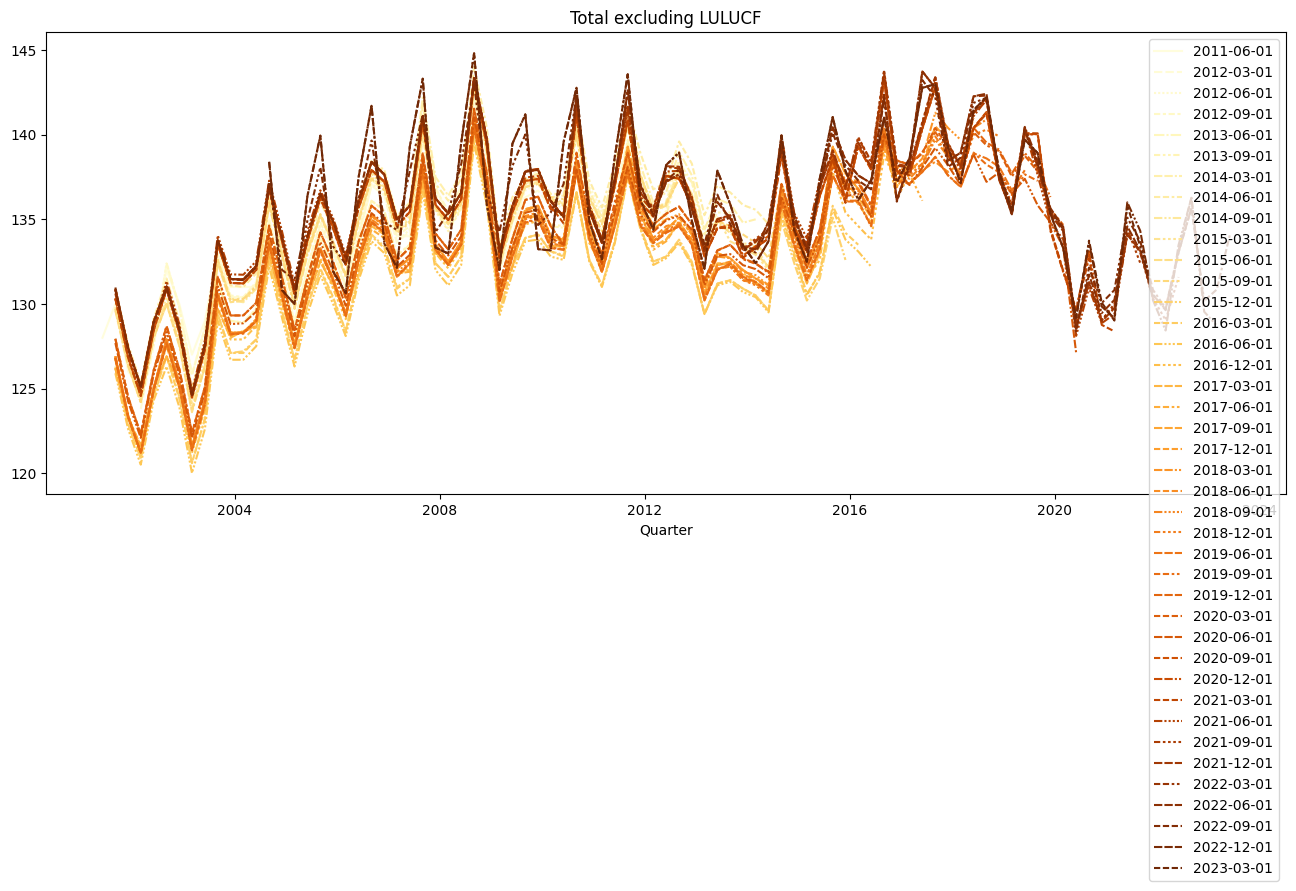

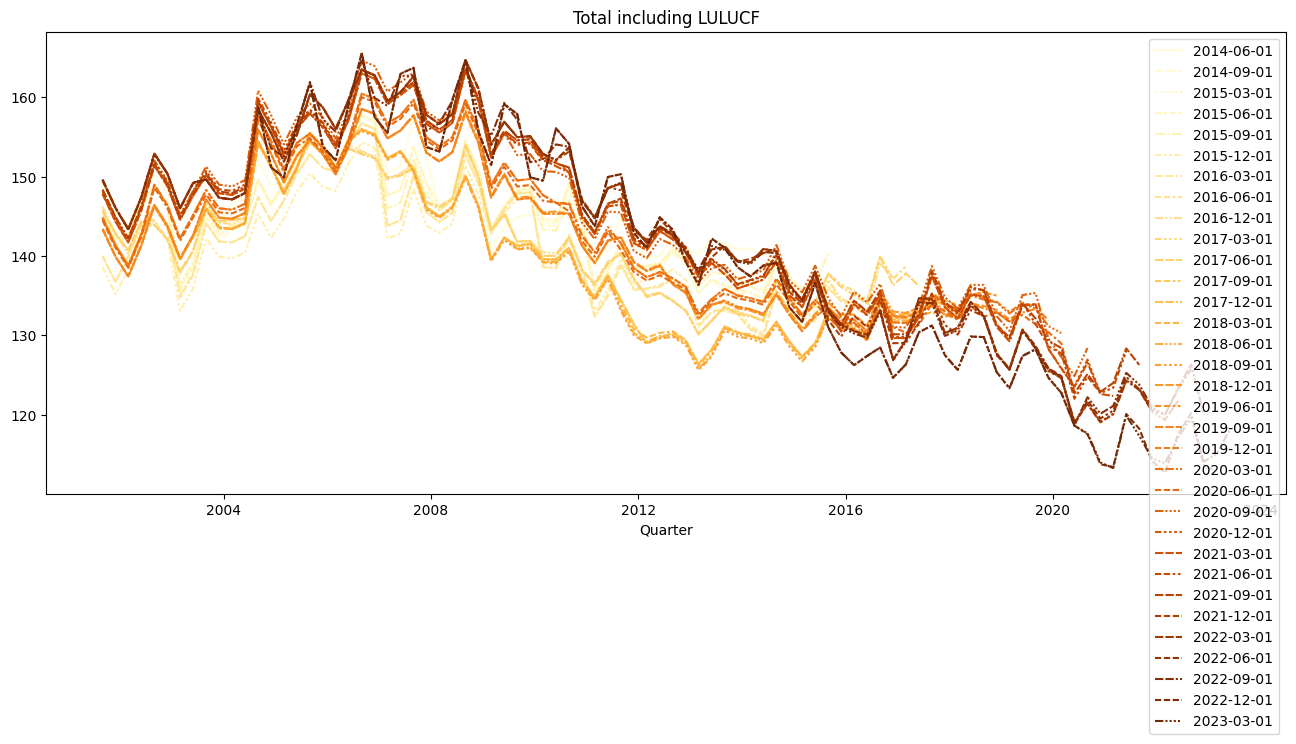

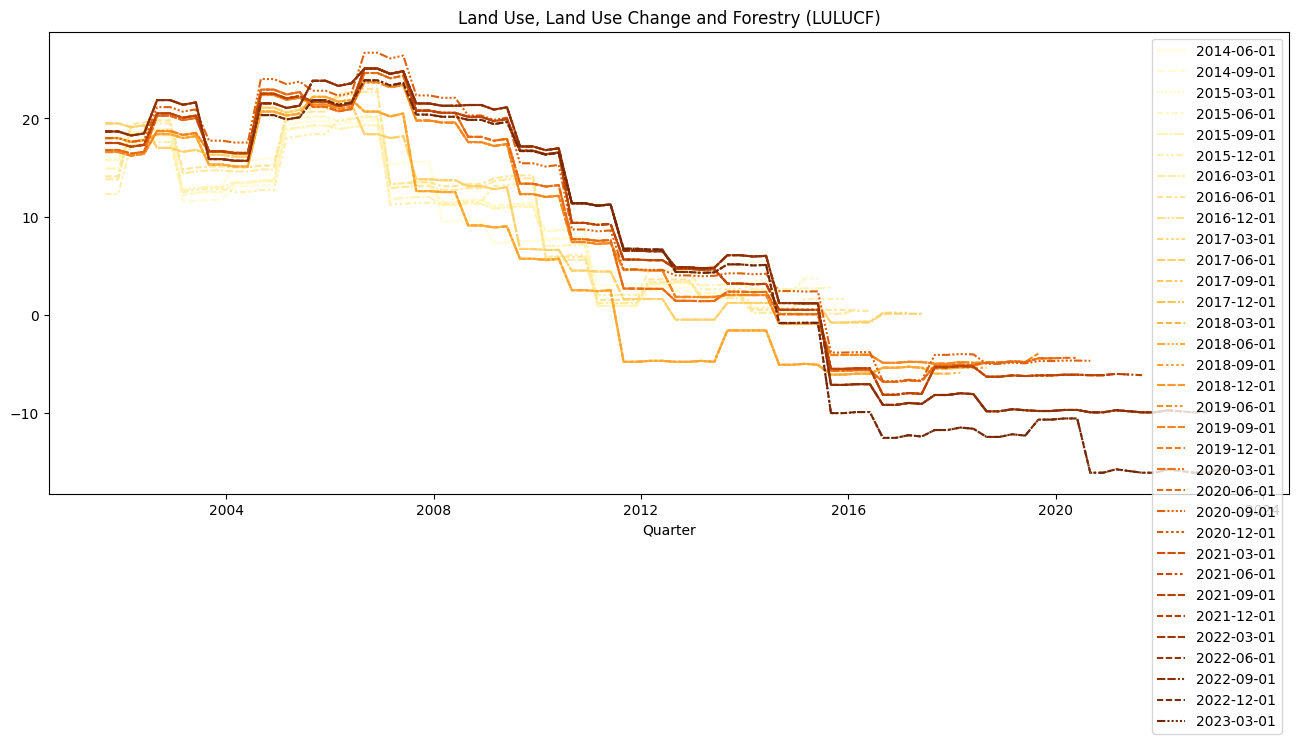

In [91]:
iterrer = pathlib.Path('inter/first_clean')
fillos = list(iterrer.rglob("*.csv"))

# keep = ['2023-03-01', '2022-12-01']
# fillos = [x for x in fillos if any(s in str(x) for s in keep)]

# Quarter', 'Total excluding LULUCF', 'Total including LULUCF', 'Land Use, Land Use Change and Forestry (LULUCF)'
thing = 'Land Use, Land Use Change and Forestry (LULUCF)'

for thing in ['Total excluding LULUCF', 'Total including LULUCF', 'Land Use, Land Use Change and Forestry (LULUCF)']:

    listo = []

    for fillo in fillos:
        stemmo = str(fillo).split("/")[-1].replace(".csv", '')

        inter = pd.read_csv(fillo)
        if thing in inter.columns.tolist():
        # print(inter.columns.tolist())
            inter = inter[['Quarter', thing]]
            inter.rename(columns={thing: stemmo}, inplace=True)

            inter['Quarter'] = pd.to_datetime(inter['Quarter'])
            inter['Quarter'] = inter['Quarter'].dt.strftime("%Y-%m-%d")
            inter.set_index("Quarter", inplace=True)
            listo.append(inter)

    cat = pd.concat(listo, axis=1)
    cols = cat.columns.tolist()
    cols.sort()
    cat = cat[cols]


    cat.reset_index(inplace=True)

    cat['Quarter'] = pd.to_datetime(cat['Quarter'])
    cat.set_index('Quarter', inplace=True)
    # pp(cat)
    plt.figure(figsize=(16, 6))
    sns.lineplot(data=cat, palette="YlOrBr").set(title=thing)

[Text(0.5, 1.0, 'Total incl LLUCF - differences between each inventory and one released 2023-03-01')]

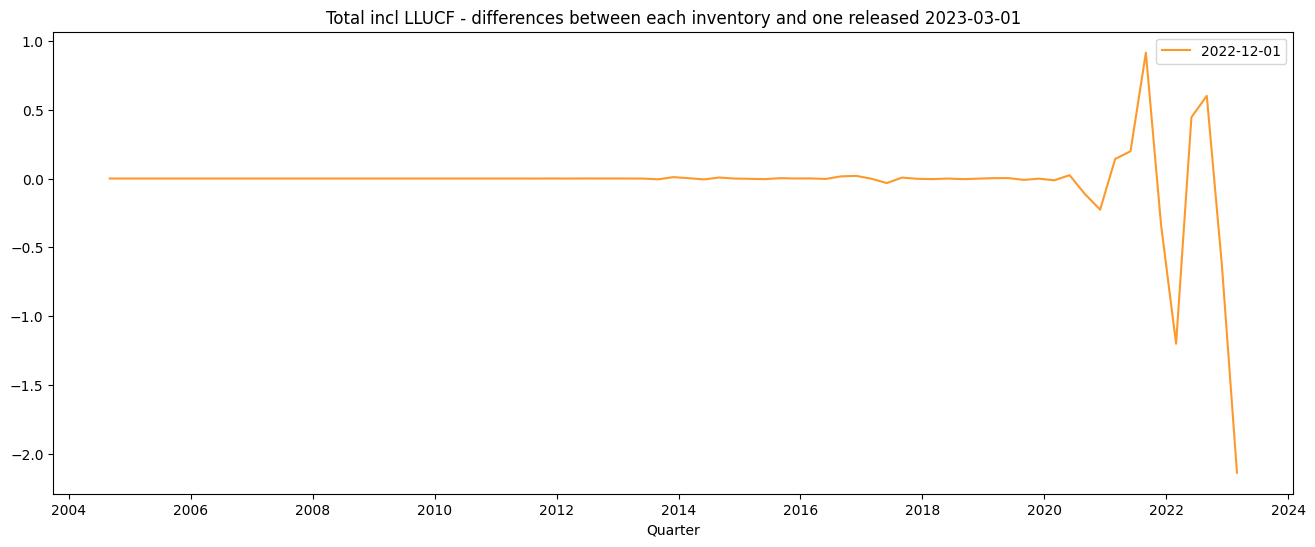

In [92]:
iterrer = pathlib.Path('inter/first_clean')
fillos = list(iterrer.rglob("*.csv"))

# Quarter', 'Total excluding LULUCF', 'Total including LULUCF', 'Land Use, Land Use Change and Forestry (LULUCF)'
thing = 'Land Use, Land Use Change and Forestry (LULUCF)'

keep = ['2023-03-01', '2022-12-01']
fillos = [x for x in fillos if any(s in str(x) for s in keep)]
for thing in ['Total including LULUCF']:

    listo = []

    for fillo in fillos:
        stemmo = str(fillo).split("/")[-1].replace(".csv", '')

        inter = pd.read_csv(fillo)
        if thing in inter.columns.tolist():
        # print(inter.columns.tolist())
            inter = inter[['Quarter', thing]]
            inter.rename(columns={thing: stemmo}, inplace=True)

            inter['Quarter'] = pd.to_datetime(inter['Quarter'])
            inter['Quarter'] = inter['Quarter'].dt.strftime("%Y-%m-%d")
            inter.set_index("Quarter", inplace=True)
            listo.append(inter)

cat = pd.concat(listo, axis=1)
cols = cat.columns.tolist()
cols.sort()
cat = cat[cols]

cat.dropna(subset=["2023-03-01"], inplace=True)

for col in cat.columns.tolist():
    cat[col] = cat[col] - cat["2023-03-01"]

cat.drop(columns={"2023-03-01"}, inplace=True)

cat.reset_index(inplace=True)

cat['Quarter'] = pd.to_datetime(cat['Quarter'])
cat.set_index('Quarter', inplace=True)
# pp(cat)
plt.figure(figsize=(16, 6))
sns.lineplot(data=cat, palette="YlOrBr").set(title="Total incl LLUCF - differences between each inventory and one released 2023-03-01")